#### The goal is to create a model to algorithmically predict if a review is positive or negative just based on its text.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob
from collections import Counter
import string
import nltk

In [2]:
df = pd.read_json('reviews_Digital_Music_5.json', lines=True)

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


##### Reviewing the data

In [4]:
df.shape

(64706, 9)

In [5]:
df.isnull().sum()

asin                0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      177
summary             0
unixReviewTime      0
dtype: int64

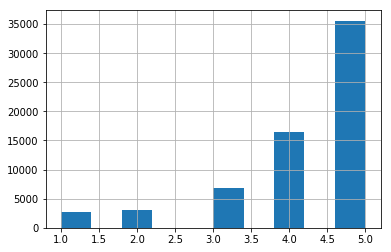

In [6]:
df.overall.hist()

In [7]:
df['overall'].value_counts()

5    35580
4    16536
3     6789
2     3010
1     2791
Name: overall, dtype: int64

##### Creating a feature set with randomized data subset for computational workload reduction.

In [8]:
df = df.sample(frac=0.25)

# Dropping columns that won't help me in my sentiment analysis
features = df[['reviewerID', 'reviewText', 'summary', 'overall']]

In [9]:
features.head()

,reviewerID,reviewText,summary,overall
10077,A36CUVZ2FD4SOO,&quot;Rocks&quot; and &quot;Pump&quot; are the...,ESSENTIAL,5
28341,A3PCTD8QM1BIXI,"After releasing two back to back discs, Blacks...",The downward spiral begin with this disc,2
3005,A3673NBQVA4J2M,This is stark raving beautiful. It has jazz fu...,I will definitely buy this one,5
13077,ADXSUMA0L8EOF,"I bought this for the title, and based on the ...",Not Wrong Enough,3
40555,A2X0B2YJ50W7HU,Usually it takes Nas a long time between album...,God's Son...incredible,4


### Taking a deeper look at sentiment

In [10]:
# Assessing sentiment of reviewText

reviewText_sentiment_list = list(features['reviewText'])
reviewText_sentiment_column = []

for i in reviewText_sentiment_list:
    reviewText_sentiment_column.append(TextBlob(i).sentiment.polarity)

features['reviewText_sentiment'] = reviewText_sentiment_column

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
# Assessing sentiment of summary

summary_sentiment_list = list(features['summary'])
summary_sentiment_column = []

for j in summary_sentiment_list:
    summary_sentiment_column.append(TextBlob(j).sentiment.polarity)
    
features['summary_sentiment'] = summary_sentiment_column

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
features.head()

,reviewerID,reviewText,summary,overall,reviewText_sentiment,summary_sentiment
10077,A36CUVZ2FD4SOO,&quot;Rocks&quot; and &quot;Pump&quot; are the...,ESSENTIAL,5,1.000000,0.000
28341,A3PCTD8QM1BIXI,"After releasing two back to back discs, Blacks...",The downward spiral begin with this disc,2,0.141234,0.000
3005,A3673NBQVA4J2M,This is stark raving beautiful. It has jazz fu...,I will definitely buy this one,5,0.412500,0.000
13077,ADXSUMA0L8EOF,"I bought this for the title, and based on the ...",Not Wrong Enough,3,0.131982,0.125
40555,A2X0B2YJ50W7HU,Usually it takes Nas a long time between album...,God's Son...incredible,4,0.242877,0.000


In [13]:
features['perfect_rating'] = 0
features.loc[(features['overall'] > 4), 'perfect_rating'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
features.head()

,reviewerID,reviewText,summary,overall,reviewText_sentiment,summary_sentiment,perfect_rating
10077,A36CUVZ2FD4SOO,&quot;Rocks&quot; and &quot;Pump&quot; are the...,ESSENTIAL,5,1.000000,0.000,1
28341,A3PCTD8QM1BIXI,"After releasing two back to back discs, Blacks...",The downward spiral begin with this disc,2,0.141234,0.000,0
3005,A3673NBQVA4J2M,This is stark raving beautiful. It has jazz fu...,I will definitely buy this one,5,0.412500,0.000,1
13077,ADXSUMA0L8EOF,"I bought this for the title, and based on the ...",Not Wrong Enough,3,0.131982,0.125,0
40555,A2X0B2YJ50W7HU,Usually it takes Nas a long time between album...,God's Son...incredible,4,0.242877,0.000,0


##### Running a Naive Bayes model

In [15]:
features.columns

Index(['reviewerID', 'reviewText', 'summary', 'overall',
       'reviewText_sentiment', 'summary_sentiment', 'perfect_rating'],
      dtype='object')

In [16]:
data = features[['overall', 'reviewText_sentiment', 'summary_sentiment']]
target = features['perfect_rating']

from sklearn.naive_bayes import BernoulliNB

# instantiate the model and store it in a new variable
bnb = BernoulliNB()

# fit the model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display the results
print("Number of mislabeled points out of a total {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 16176 points: 6895


In [17]:
accuracy = ((16176-6947)/16176)
print("Accuracy score: ")
print(accuracy)

Accuracy score: 
0.5705365974282888


##### Running a Random Forest Classifier

In [18]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_estimators = 500)

X = features[['reviewText_sentiment', 'summary_sentiment']]
Y = features['perfect_rating']

score = cross_val_score(rfc, X, Y, cv=10)
print(score)
print('Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

[0.56825201 0.56825201 0.5908529  0.56427689 0.57390229 0.57761286
 0.57390229 0.57266543 0.58503401 0.56462585]
Accuracy: 0.57 (+/- 0.02)
